In [1]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
df1 = pd.read_csv("/kaggle/input/gene-expression/Liver_GSE14520_U133A.csv")
df2 = pd.read_csv("/kaggle/input/gene-expression/Liver_GSE14520_U133_2.csv")
df3 = pd.read_csv("/kaggle/input/gene-expression/Liver_GSE22405.csv")
df4 = pd.read_csv("/kaggle/input/gene-expression/Liver_GSE60502.csv")

In [3]:
data1 = df1.drop(columns =["samples"], axis=1)
data1 = data1.drop(264)
data1.to_csv("/kaggle/working/Liver_GSE14520_U133A.csv")

data2 = df2.drop(columns =["samples"], axis=1)
data2.to_csv("/kaggle/working/Liver_GSE22405.csv")

data3 = df3.drop(columns =["samples"], axis=1)
data3['type'] = data3['type'].replace(['heptocarcinoma'],['HCC'])
data3.to_csv("/kaggle/working/Liver_GSE60502.csv")

data4 = df4.drop(columns =["samples"], axis=1)
data4.to_csv("/kaggle/working/Liver_GSE60502.csv")

In [4]:
result = pd.concat([data1,data2,data3, data4])

In [5]:
result2 = result.drop(columns =["AFFX-r2-Hs18SrRNA-3_s_at", "AFFX-r2-Hs18SrRNA-5_at","AFFX-r2-Hs18SrRNA-M_x_at", "AFFX-r2-Hs28SrRNA-3_at", "AFFX-r2-Hs28SrRNA-5_at", "AFFX-r2-Hs28SrRNA-M_at"])

<Axes: xlabel='type', ylabel='count'>

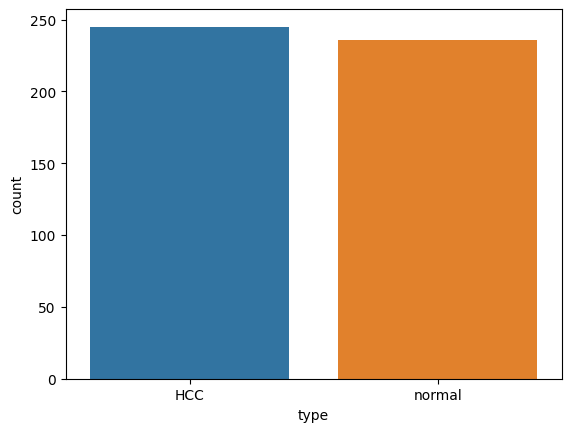

In [6]:
sns.countplot(x = result2["type"])

In [7]:
cat_list = result2.select_dtypes(include = "object").columns
cat_list

Index(['type'], dtype='object')

In [8]:
def change(value):
  if value == 'normal':
    return 1
  else:
    return 0

result2['type'] = result2['type'].apply(change)

In [9]:
x = result2.drop("type" , axis = 1).values
y = result2['type'].values

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty= 'l2', C = 0.5)

In [13]:
lr.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [14]:
print(lr.score(x_train , y_train))
print(lr.score(x_test , y_test))

1.0
0.9690721649484536


In [15]:
y_pred = lr.predict(x_test)
y_true = y_test

In [16]:
result2 = pd.DataFrame({"Y_test": y_test, "y_pred": y_pred})

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9690721649484536


In [18]:
from sklearn.model_selection import cross_val_score, KFold
K_fold = KFold (n_splits = 10, shuffle = True, random_state = 42)

In [19]:
scoring  = "accuracy"
score = cross_val_score(lr, x, y, cv = K_fold, scoring = scoring)
print (score)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.95918367 1.         0.97916667 0.95833333 0.97916667 0.95833333
 1.         0.89583333 0.97916667 0.95833333]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
input_sequence = [7.803370,	4.134075,	3.433113,	5.395057,	3.476944,	5.825713,	3.505036,	3.687333,	4.515175,	10.892460,	10.416151,	12.356337,	11.888482,	3.839367,	3.598851,	3.516791,	3.484089,	3.282626,	3.512024]
Input_len = len(input_sequence)
for i in range(22277 - Input_len):
   input_sequence.append(0)
input_sequence = [input_sequence]

input_sequence = np.array(input_sequence)
predicted_output = lr.predict(input_sequence)

if predicted_output[0 == 0]:
   print("HCC")
else:
   print("Normal")

Normal


In [21]:
def predict(input_sequence, model):
  input_sequence = sc.transofrm(input_sequence)
  Input_len = len(input_sequence)
  diff = 22277 - Input_len
  zeros = [0] * diff
  input_sequence.extend(zeros)

  input_sequence = [input_sequence]

  input_sequence = np.array(input_sequence)
  predicted_output = model.predict(input_sequence)

  if predicted_output[0 == 0]:
    return "hcc"
  else:
    return "normal"

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.94      1.00      0.97        45

    accuracy                           0.97        97
   macro avg       0.97      0.97      0.97        97
weighted avg       0.97      0.97      0.97        97



In [24]:
cm = confusion_matrix(y_true, y_pred)

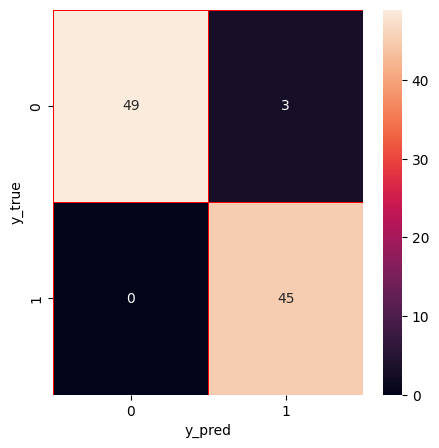

In [25]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()